In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv('housing[1].csv')

# Visualize data

In [259]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [260]:
df['median_house_value'].max()

np.float64(500001.0)

Text(0, 0.5, 'Latitude')

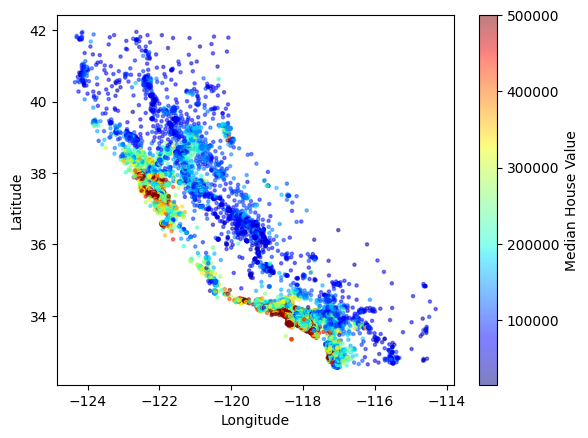

In [261]:
map = plt.scatter(df['longitude'], df['latitude'], cmap='jet', c=df['median_house_value'], s=5, alpha=0.5)
plt.colorbar(map, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [262]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [263]:
near_bay_df = df.loc[df['ocean_proximity'] == 'NEAR BAY']


Text(0.5, 1.0, 'Near Bay Houses')

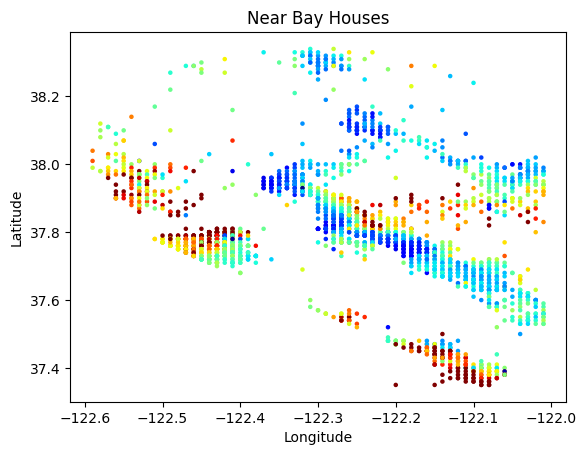

In [264]:
plt.scatter(near_bay_df['longitude'], near_bay_df['latitude'], cmap='jet', c=near_bay_df['median_house_value'], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Near Bay Houses')

In [265]:
near_ocean_df = df.loc[df['ocean_proximity'] == 'NEAR OCEAN']


Text(0.5, 1.0, 'Near Ocean Houses')

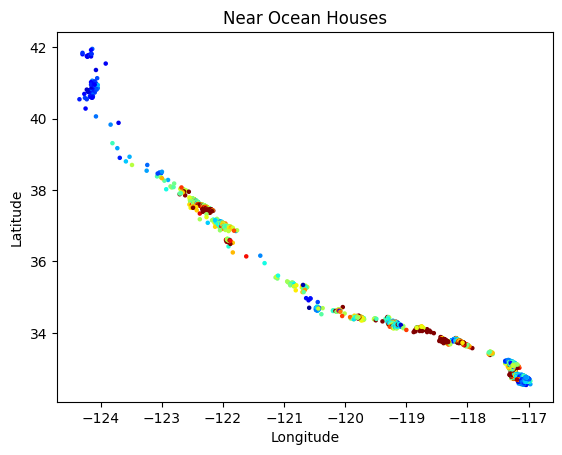

In [266]:
plt.scatter(near_ocean_df['longitude'], near_ocean_df['latitude'], cmap='jet', c=near_ocean_df['median_house_value'], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Near Ocean Houses')

In [267]:
df['ocean_proximity'].value_counts().index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')

In [268]:
df['ocean_proximity'] = df['ocean_proximity'].map({'<1HR OCEAN': 2, 'INLAND': 1, 'NEAR OCEAN': 3, 'NEAR BAY': 3, 'ISLAND': 4})

In [269]:
coor_matrix = df.corr()

In [270]:
coor_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
ocean_proximity       0.553897
Name: median_house_value, dtype: float64

In [271]:
df['bedrooms_per_house'] = df['total_bedrooms'] / df['households']

In [272]:
df['rooms_per_house'] = df['total_rooms'] / df['households']

In [273]:
coor_matrix = df.corr()

In [274]:
coor_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
ocean_proximity       0.553897
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
bedrooms_per_house   -0.046739
latitude             -0.144160
Name: median_house_value, dtype: float64

In [275]:
df_nums = df.drop(columns='ocean_proximity').copy()

In [276]:
df_nums

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_house,rooms_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.023810,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.971880,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.073446,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.073059,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.081081,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.133333,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.315789,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.120092,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.171920,5.329513


In [277]:
type(df_nums.iloc[0].shape)

tuple

# Create the model

In [278]:
class LinearRegression:
    def __init__(self, lr = 0.01, iters = 100):
        self.w = None
        self.b = None
        self.iters = iters
        self.lr = lr
    
    def h(self, X):
        pred = 0
        n = X.shape[0]
        for i in range(n):
            pred = pred + self.w[i] * X.iloc[i]
        pred = pred + self.b
        return pred



    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.iters):
            for i in range(n):
                dw = 0
                for j in range(m):
                   dw = dw + 2 / m * self.h(X.iloc[j]) * X.iloc[j].iloc[i]
                self.w[i] = self.w[i] - self.lr * dw
            db = 0
            for j in range(m):
                db = db + 2 / m * self.h(X.iloc[j])
            
            self.b = self.b - self.lr * db
    
    def predict(self, X):
        m, n = X.shape

        pred = []
        for i in range(m):
            pred.append(self.h(X.iloc[i]))
        return pred
    


In [279]:
X = df_nums.drop(columns='median_house_value')
y = df_nums['median_house_value']

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

In [282]:
model = LinearRegression()

In [283]:
model.fit(X_train, y_train)

KeyboardInterrupt: 